In [2]:
#!pip install pandas transformers torch===1.7.1+cu110 torchvision===0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html 

Looking in links: https://download.pytorch.org/whl/torch_stable.html
  Using cached numpy-1.22.3-cp39-cp39-win_amd64.whl (14.7 MB)


### Downloading Finbert + TweetEval

In [1]:
import pandas as pd
from transformers import BertForSequenceClassification, BertTokenizer, DistilBertTokenizerFast
import torch
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer



model_finbert = BertForSequenceClassification.from_pretrained('ProsusAI/finbert').to(device=torch.device("cuda:0"))
tokenizer_finbert = BertTokenizer.from_pretrained('ProsusAI/finbert')

tokenizer_tweeteval = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model_tweeteval = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

# BEZ oriznuti:
# https://towardsdatascience.com/how-to-apply-transformers-to-any-length-of-text-a5601410af7f
pipe_finbert = TextClassificationPipeline(model=model_finbert, tokenizer=tokenizer_finbert, return_all_scores=True,device=0,max_length=32,truncation=True)


pipe_tweeteval = TextClassificationPipeline(model=model_tweeteval, tokenizer=tokenizer_tweeteval, return_all_scores=True,device=0,max_length=64,truncation=True)

C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Calculating ticker tweet sentiments

In [3]:
import re
import numpy as np
tweets = pd.read_csv("Twitter/tweets_tickers.csv")
tweets['content'] = tweets['content'].str.replace(r'http\S+', '', regex=True)
tweets = tweets[tweets["lang"]=="en"]
#tweets['content'].str.replace(r"@[A-Za-z0-9]+", '', regex=True)

tweets_sentiments = pd.DataFrame([])

for batch in np.array_split(tweets, 100):
    batch = batch.reset_index(drop = True)
    output_finbert = pipe_finbert(list(batch["content"]), batch_size=500)
    output_tweeteval = pipe_tweeteval(list(batch["content"]), batch_size=500)

    batch["finbert_sentiment_pos"] = pd.DataFrame.from_dict(output_finbert)[0].apply(pd.Series)["score"]
    batch["finbert_sentiment_neg"] = pd.DataFrame.from_dict(output_finbert)[1].apply(pd.Series)["score"]
    batch["finbert_sentiment_neu"] = pd.DataFrame.from_dict(output_finbert)[2].apply(pd.Series)["score"]
    
    batch["tweeteval_sentiment_pos"] = pd.DataFrame.from_dict(output_tweeteval)[2].apply(pd.Series)["score"]
    batch["tweeteval_sentiment_neg"] = pd.DataFrame.from_dict(output_tweeteval)[0].apply(pd.Series)["score"]
    batch["tweeteval_sentiment_neu"] = pd.DataFrame.from_dict(output_tweeteval)[1].apply(pd.Series)["score"]

    tweets_sentiments = pd.concat([tweets_sentiments, batch], axis = 0, ignore_index=True)
    
    tweets_sentiments.to_csv("Twitter/tweets_tickers.csv", index=False)

    print('Saving: ', str(tweets_sentiments.shape[0]))


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  27621


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  55242


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  82863


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  110484


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  138105


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  165726


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  193347


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  220968


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  248589


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  276210


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  303831


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  331452


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  359073


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  386694


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  414315


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  441936


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  469557


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  497178


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  524799


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  552420


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  580041


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  607662


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  635283


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  662904


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  690525


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  718146


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  745767


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  773388


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  801009


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  828630


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  856251


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  883872


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  911493


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  939114


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  966735


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  994356


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1021977


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1049598


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1077219


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1104840


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1132461


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1160082


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1187703


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1215324


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1242945


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1270566


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1298187


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1325808


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1353429


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1381050


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1408671


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1436292


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1463913


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1491534


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1519155


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1546776


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1574397


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1602018


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1629639


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1657260


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1684881


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1712502


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1740123


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1767744


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1795365


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1822986


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1850607


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1878228


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1905849


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1933470


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1961091


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  1988712


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2016333


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2043954


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2071575


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2099196


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2126817


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2154438


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2182059


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2209680


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2237301


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2264922


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2292543


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2320164


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2347785


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2375406


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2403027


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2430648


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2458269


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2485890


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2513511


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2541132


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2568753


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2596374


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2623994


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2651614


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2679234


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2706854


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2734474


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2762094


### Calculating keyword tweet sentiments

In [2]:
import re
import numpy as np
tweets = pd.read_csv("Twitter/tweets_keywords.csv")
tweets['content'] = tweets['content'].str.replace(r'http\S+', '', regex=True)
tweets = tweets[tweets["lang"]=="en"]
#tweets['content'].str.replace(r"@[A-Za-z0-9]+", '', regex=True)

tweets_sentiments = pd.DataFrame([])

for batch in np.array_split(tweets, 100):
    batch = batch.reset_index(drop = True)
    output_finbert = pipe_finbert(list(batch["content"]), batch_size=500)
    output_tweeteval = pipe_tweeteval(list(batch["content"]), batch_size=500)

    batch["finbert_sentiment_pos"] = pd.DataFrame.from_dict(output_finbert)[0].apply(pd.Series)["score"]
    batch["finbert_sentiment_neg"] = pd.DataFrame.from_dict(output_finbert)[1].apply(pd.Series)["score"]
    batch["finbert_sentiment_neu"] = pd.DataFrame.from_dict(output_finbert)[2].apply(pd.Series)["score"]
    
    batch["tweeteval_sentiment_pos"] = pd.DataFrame.from_dict(output_tweeteval)[2].apply(pd.Series)["score"]
    batch["tweeteval_sentiment_neg"] = pd.DataFrame.from_dict(output_tweeteval)[0].apply(pd.Series)["score"]
    batch["tweeteval_sentiment_neu"] = pd.DataFrame.from_dict(output_tweeteval)[1].apply(pd.Series)["score"]

    tweets_sentiments = pd.concat([tweets_sentiments, batch], axis = 0, ignore_index=True)
    
    tweets_sentiments.to_csv("Twitter/tweets_keywords.csv", index=False)

    print('Saving: ', str(tweets_sentiments.shape[0]))


Saving:  2256843
Saving:  2281037
Saving:  2305231
Saving:  2329425
Saving:  2353619
Saving:  2377813
Saving:  2402007
Saving:  2426201
Saving:  2450395
Saving:  2474589


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2498783


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2522977


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2547171


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2571365


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2595559


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2619753


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2643947


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2668141


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2692335


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2716529


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2740723


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2764917


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2789111


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2813305


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2837499


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2861692


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2885885


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2910078


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2934271


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2958464


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  2982657


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3006850


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3031043


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3055236


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3079429


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3103622


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3127815


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3152008


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3176201


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3200394


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3224587


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3248780


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3272973


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3297166


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3321359


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3345552


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3369745


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3393938


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3418131


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3442324


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_17996\1961351819.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_sentiments = pd.read_csv("Twitter/tweets_keywords_sentiments.csv")


Saving:  3466517


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3490710


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3514903


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3539096


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_17996\1961351819.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_sentiments = pd.read_csv("Twitter/tweets_keywords_sentiments.csv")


Saving:  3563289


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3587482


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3611675


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3635868


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3660061


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3684254


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3708447


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3732640


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3756833


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3781026


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3805219


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3829412


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3853605


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3877798


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3901991


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_17996\1961351819.py:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets_sentiments = pd.read_csv("Twitter/tweets_keywords_sentiments.csv")


Saving:  3926184


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3950377


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3974570


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  3998763


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4022956


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4047149


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4071342


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4095535


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4119728


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4143921


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4168114


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4192307


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4216500


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4240693


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4264886


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4289079


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4313272


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4337465


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4361658


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4385851


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4410044


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4434237


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4458430


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4482623


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4506816


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4531009


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4555202


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4579395


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4603588


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4627781


C:\ProgramData\Anaconda3\envs\cuda\lib\site-packages\transformers\pipelines\base.py:996: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Saving:  4651974


### Post processing ticker tweets

In [2]:
import pandas as pd
import gc
import numpy as np

tweets = pd.read_csv("Twitter/tweets_tickers_sentiments.csv")
tweets = tweets[tweets["lang"]=="en"]
tweets['content'] = tweets['content'].str.replace(r"@[A-Za-z0-9]+", '', regex=True)
tweets['content'] = tweets['content'].str.replace(r'http\S+', '', regex=True)
tweets["date"] = pd.to_datetime(pd.to_datetime(tweets["date"]).dt.date)
tweets = tweets[(tweets["date"]>="2015-01-01")&(tweets["date"]<="2022-04-30")]
tweets.loc[tweets["date"].dt.weekday==5,"date"] = tweets["date"] + pd.DateOffset(days=2)
tweets.loc[tweets["date"].dt.weekday==6,"date"] = tweets["date"] + pd.DateOffset(days=1)


keywords = {
    "AAPL" : "\$aapl",
    "MSFT" : "\$msft",
    "GOOGL" : "\$googl",
    "AMZN" : "\$amzn",
    "FB" : "\$fb",
    "TSLA" : "\$tsla",
    "BRK-A" : "\$brk",
    "TSM" : "\$tsm",
    "NVDA" : "\$nvda",
    "JPM" : "\$jpm",
    "GME" : "\$gme"
    }


d = pd.DataFrame()
for ticker,keyword in keywords.items():
    print(ticker)
    s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
    s.loc[:,"ticker"] = ticker
    s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
    s.loc[:,"tweeteval_sentiment"] = s.loc[:,"tweeteval_sentiment_pos"] - s.loc[:,"tweeteval_sentiment_neg"]
    s = s[["date","ticker","content","replyCount","retweetCount","likeCount","lang","finbert_sentiment","tweeteval_sentiment"]]
    d = pd.concat([d,s])
    del s
    gc.collect()
    
d = d.drop_duplicates(['date','ticker','content'])

cashtags_data = d.groupby(["date","ticker"])[["replyCount","retweetCount","likeCount"]].sum()
cashtags_data["tweetCount"] = d.groupby(["date","ticker"])["content"].count()

d["retweetCount"] = d["retweetCount"] + 1
cashtags_data["sent_tweeteval"] = d.groupby(["date","ticker"]).apply(lambda x: np.average(x.tweeteval_sentiment, weights=x.retweetCount))
cashtags_data["sent_finbert"] = d.groupby(["date","ticker"]).apply(lambda x: np.average(x.finbert_sentiment, weights=x.retweetCount))

AAPL


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

MSFT


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

GOOGL


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

AMZN


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

FB


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

TSLA


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

BRK-A


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

TSM


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

NVDA


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

JPM


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

GME


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\2855993856.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [85]:
d.groupby("ticker")[["replyCount","retweetCount","likeCount"]].sum()

,replyCount,retweetCount,likeCount
ticker,,,
AAPL,375744,816311,4022754
AMZN,317746,661012,3502201
BRK-A,15676,33056,157019
FB,267916,553654,2807459
GME,926195,1875724,13669685
GOOGL,89445,241026,1076968
JPM,33352,98624,356711
MSFT,144424,322296,1715552
NVDA,131172,219507,1479504


In [88]:
d.groupby("ticker")[["content"]].count()

,content
ticker,
AAPL,53792
AMZN,43992
BRK-A,2199
FB,39682
GME,87094
GOOGL,13377
JPM,5970
MSFT,20921
NVDA,19894


### Post processing ticker tweets

In [3]:
import pandas as pd
import gc

tweets = pd.read_csv("Twitter/tweets_keywords_sentiments.csv")
tweets = tweets[tweets["lang"]=="en"]
tweets['content'] = tweets['content'].str.replace(r"@[A-Za-z0-9]+", '', regex=True)
tweets['content'] = tweets['content'].str.replace(r'http\S+', '', regex=True)
tweets["date"] = pd.to_datetime(pd.to_datetime(tweets["date"]).dt.date)
tweets = tweets[(tweets["date"]>="2015-01-01")&(tweets["date"]<="2022-04-30")]
tweets.loc[tweets["date"].dt.weekday==5,"date"] = tweets["date"] + pd.DateOffset(days=2)
tweets.loc[tweets["date"].dt.weekday==6,"date"] = tweets["date"] + pd.DateOffset(days=1)


keywords = {
    "AAPL" : "(\$aapl|apple|steve jobs|steve wozniak|ronald wayne|tim cook|macintosh|mac|ios|ipod|iphone|ipad|airpods|homepod|icloud|itunes)",
    "MSFT" : "(\$msft|microsoft|bill gates|paul allen|windows|office|skype|visual studio|xbox|azure|bing|linkedin|yammer|onedrive|outlook|github|game pass|sharepoint|visual studio|azure)",
    "GOOGL" : "(\$googl|alphabet|google|larry page|sergey brin|sundar pichai|gmail|firebase|tensorflow|android|chrome|adwords|nexus|pixel|youtube|deepmind)",
    "AMZN" : "(\$amzn|amazon|jeff bezos|andy jassy|kindle|alexa|fire tv|fire tablet|aws|audible|goodreads|imdb|twitch)",
    "FB" : "(\$fb|meta|mark zuckerberg|zuckerberg|eduardo saverin|metaverse|facebook|messenger|instagram|whatsapp|oculus|mapillary)",
    "TSLA" : "(\$tsla|tesla|elon musk|elon|musk|model s|cybertruck|model x|model y|model 3|powerwall|powerpack|deepscale|solarcity)",
    "BRK-A" : "(\$brk.a|brk.b|brk|berkshire hathaway|oliver chace|warren buffett|buffett|altalink|kern river pipeline|northern natural gas|fruit of the loom|netjets|russell brands)",
    "TSM" : "(2330|\$tsm|tsmc|taiwan semiconductor|morris chang|mark liu|cybershuttle|wafertech|ssmc)",
    "NVDA" : "(\$nvda|nvidia|jensen huang|geforce|mellanox|physx|deepmap)",
    "JPM" : "(\$jpm|jpmorgan|j.p. morgan|john pierpont morgan|jamie dimon|chase bank|one equity partners)",
    "GME" : "(\$gme|gamestop|ryan cohen|matt furlong)"
    }


d = pd.DataFrame()
for ticker,keyword in keywords.items():
    print(ticker)
    s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
    s.loc[:,"ticker"] = ticker
    s.loc[:,"finbert_sentiment"] = s.loc[:,"finbert_sentiment_pos"] - s.loc[:,"finbert_sentiment_neg"]
    s.loc[:,"tweeteval_sentiment"] = s.loc[:,"tweeteval_sentiment_pos"] - s.loc[:,"tweeteval_sentiment_neg"]
    s = s[["date","ticker","content","replyCount","retweetCount","likeCount","lang","finbert_sentiment","tweeteval_sentiment"]]
    d = pd.concat([d,s])
    del s
    gc.collect()
    
d = d.drop_duplicates(['date','ticker','content'])

keywords_data = d.groupby(["date","ticker"])[["replyCount","retweetCount","likeCount"]].sum()
keywords_data["tweetCount"] = d.groupby(["date","ticker"])["content"].count()

d["retweetCount"] = d["retweetCount"] + 1
keywords_data["sent_tweeteval"] = d.groupby(["date","ticker"]).apply(lambda x: np.average(x.tweeteval_sentiment, weights=x.retweetCount))
keywords_data["sent_finbert"] = d.groupby(["date","ticker"]).apply(lambda x: np.average(x.finbert_sentiment, weights=x.retweetCount))

AAPL


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

MSFT


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

GOOGL


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

AMZN


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

FB


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

TSLA


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

BRK-A


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

TSM


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

NVDA


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

JPM


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

GME


C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  s = tweets.loc[tweets["content"].str.lower().str.contains(keyword),:]
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s.loc[:,"ticker"] = ticker
C:\Users\Pracovní\AppData\Local\Temp\ipykernel_6280\4293243143.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

### Aggregating the sentiments

In [5]:
pd.merge(keywords_data,cashtags_data, left_index=True, right_index=True,how='outer',suffixes=('_keywords', '_cashtags')).to_csv("Twitter/tweets_sentiments_agg.csv")

### Visualisation

In [2]:
import plotly.express as px
import plotly.io as pio

import plotly.graph_objects as go
import numpy as np

In [5]:

d["retweetCount"] = d["retweetCount"] + 1
sentiment = d.groupby(["date","ticker"]).apply(lambda x: np.average(x.tweeteval_sentiment, weights=x.retweetCount)).reset_index().pivot(index='date',columns='ticker',values=0).reset_index()

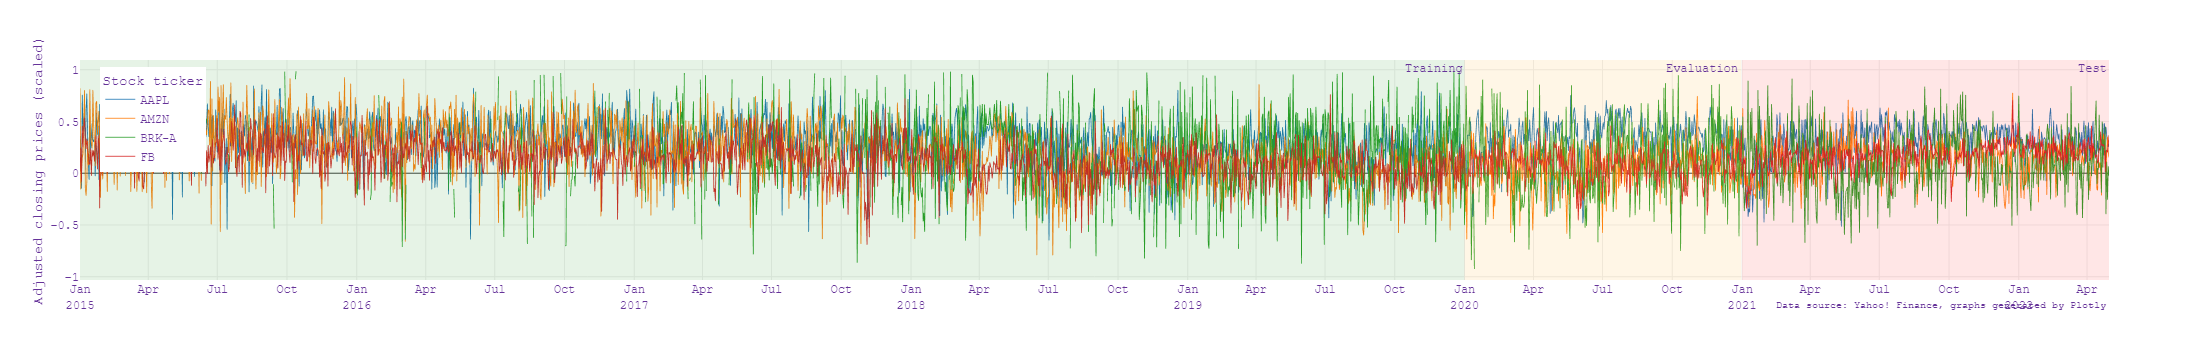

In [9]:
fig = px.line(sentiment,x=sentiment["date"], y=sentiment.columns[0:5].values.tolist(),
              color_discrete_sequence=['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD'])
fig.update_xaxes(
    dtick="M3",
    tickformat="%b\n%Y")

fig.update_traces(line=dict( width=0.8))
fig.update_layout(template=go.layout.Template(),
    title="",
    xaxis_title="",
    yaxis_title="Adjusted closing prices (scaled)",
    legend_title="Stock ticker",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
    legend=dict(
    yanchor="top",
    y=0.97,
    xanchor="left",
    x=0.01
 )
)
fig.add_vrect(x0="2015-01-01", x1="2020-01-01", 
              annotation_text="Training", annotation_position="top right",
              fillcolor="green", opacity=0.1, line_width=0)
fig.add_vrect(x0="2020-01-01", x1="2020-12-31", 
              annotation_text="Evaluation", annotation_position="top right",
              fillcolor="orange", opacity=0.1, line_width=0)
fig.add_vrect(x0="2021-01-01", x1="2022-04-30", 
              annotation_text="Test", annotation_position="top right",
              fillcolor="red", opacity=0.1, line_width=0)

fig.add_annotation(
    showarrow=False,
    text="Data source: Yahoo! Finance, graphs generated by Plotly",
    font=dict(size=10), 
    xref='x domain',
    x=1,
    yref='y domain',
    y=-0.15
    )

fig.show()

pio.write_image(fig, 'Twitter/tweeteval_keywords.pdf', height=500,width=1200,format='pdf')

In [117]:
pip install -U kaleido